In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

In [3]:
## Import advertisting dataset
boston = pd.read_csv('..\..\datasets\Boston.csv', index_col='Unnamed: 0')
display(boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Will perform MLR Using Statsmodels

In [4]:
## Using statsmodels for ouptut

linear_model = ols('medv ~ lstat + age', data=boston).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           2.98e-88
Time:                        11:27:34   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [5]:
## Use all Variables in Boston Dataset

all_columns = "+".join(boston.drop(columns='medv').columns)
all_p_formula = "medv~" + all_columns

#print(all_p_formula)

linear_model = ols(all_p_formula, data=boston).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          6.72e-135
Time:                        11:27:34   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [6]:
## Calculate VIF Scores for each predictor
## Looking for VIF to be less than 5 or 10

X = boston.drop(columns=['medv'])
y = boston.medv

## statsmodels.variance_inflation_factor expects the presence of a constant in the matrix of explanatory variables
## Must use this add_constant function to add the required constant
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data['predictor'] = X.columns

vif_data['vif_score'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

display(vif_data.sort_values(by='vif_score'))

,predictor,vif_score
4,chas,1.073995
12,black,1.348521
1,crim,1.792192
11,ptratio,1.799084
6,rm,1.933744
2,zn,2.298758
13,lstat,2.941491
7,age,3.100826
8,dis,3.955945
3,indus,3.991596


## Interaction Terms

In [7]:
## The syntax 'predictor1 * predictor2' simultaneously includes both predictors and their interaction term
## Short hand for 'predictor1 + predictor2 + predictor1:predictor2'

linear_model = ols('medv ~ lstat * age', data=boston).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           4.86e-88
Time:                        11:27:34   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

## Non-linear Transformations of the Predictors

In [8]:
## For non-linear transformations you can use the I() function to wrap around a transformation

linear_model2 = ols('medv ~ lstat + I(lstat**2)', data=boston).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           4.86e-88
Time:                        11:27:34   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

In [9]:
## Use of anova to see if the models fit the data equally well or not
## This shows clearly that the model with the quadratic term performs better
## Lower SSR, high F and low p demonstrate significance in difference between models

table = sm.stats.anova_lm(ols('medv ~ lstat', data=boston).fit(), linear_model2, typ=1)

print(table)

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


In [10]:
print(linear_model2.predict(boston.lstat))

1      32.324539
2      25.177912
3      34.167979
4      36.379915
5      31.665190
         ...    
502    24.375649
503    25.270276
504    31.090105
505    29.573878
506    27.183395
Length: 506, dtype: float64


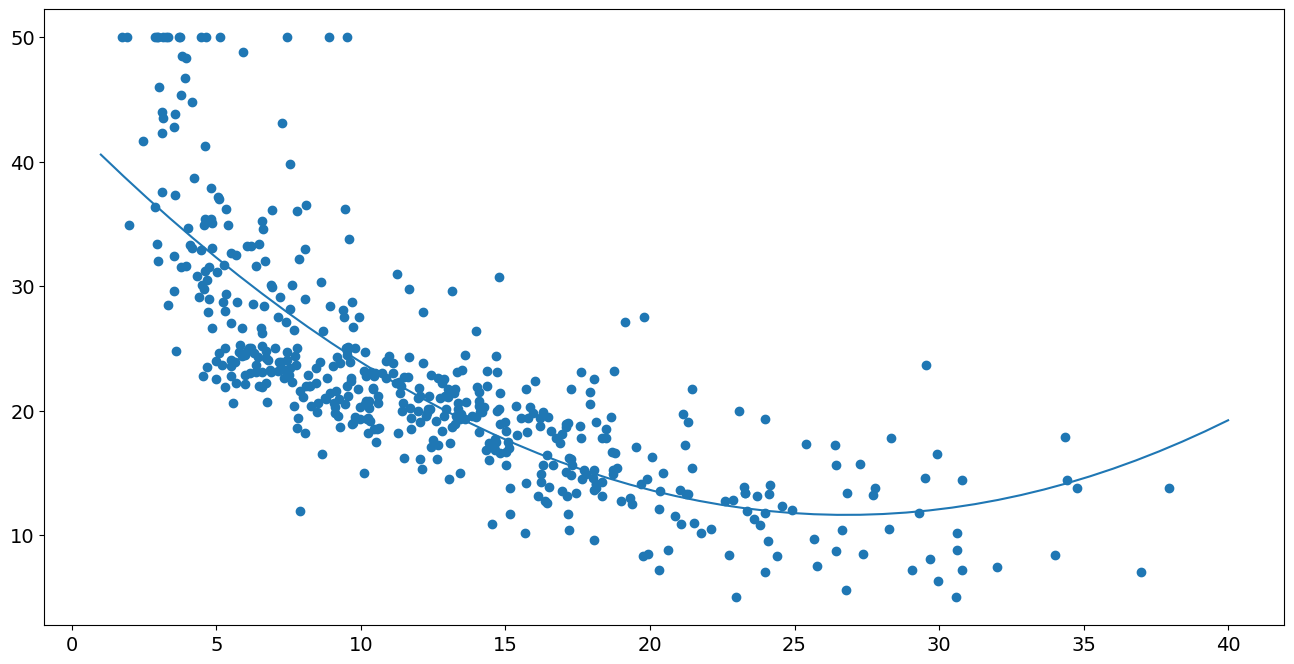

In [17]:
plt.scatter(boston.lstat, boston.medv)

## Use of numpy polynomial fit for creation of the regression line
y_hat_line = np.linspace(1, 40, 50)

## Numpy model for quadratic fit on lstat
poly_model = np.poly1d(np.polyfit(boston.lstat, boston.medv, 2))

plt.plot(y_hat_line, poly_model(y_hat_line))

plt.show()

## Qualitative Predictors

In [18]:
## Import Carseats dataset
carseats = pd.read_csv('..\..\datasets\Carseats.csv', index_col='Unnamed: 0')
display(carseats)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
396,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
397,6.14,139,23,3,37,120,Medium,55,11,No,Yes
398,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
399,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [19]:
## Include Qualitative predictor Shelveloc and Interaction terms and all other predictors

all_columns = "+".join(carseats.drop(columns='Sales').columns)

linear_model = ols(f'Sales ~ {all_columns} + Income:Advertising + Price:Age', data=carseats).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          6.14e-166
Time:                        11:37:12   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756    